# 📊 E-commerce Sales Data Analysis & Revenue Optimization
This project analyzes synthetic e-commerce transaction data using **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **SciPy**.
It includes data cleaning, exploratory data analysis, visualization, and statistical hypothesis testing.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv("ecommerce_sales.csv")
df.head()


,Order ID,Order Date,Product,Quantity Ordered,Price Each,City,Customer ID
0,1,04-11-2024,Smartwatch,1,1045.93,Boston,1072
1,2,20-03-2024,Monitor,3,1235.73,New York City,1096
2,3,09-02-2024,Tablet,4,80.95,New York City,1095
3,4,09-04-2024,Keyboard,4,1012.17,Los Angeles,1047
4,5,07-02-2024,Smartwatch,3,1428.29,Chicago,1069


In [2]:

# Data Cleaning
print("Initial Shape:", df.shape)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.month
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']
df.head()


Initial Shape: (1000, 7)


C:\Users\Priyanshu Bhardwaj\AppData\Local\Temp\ipykernel_21508\635704255.py:5: UserWarning: Parsing '20-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\Priyanshu Bhardwaj\AppData\Local\Temp\ipykernel_21508\635704255.py:5: UserWarning: Parsing '29-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\Priyanshu Bhardwaj\AppData\Local\Temp\ipykernel_21508\635704255.py:5: UserWarning: Parsing '21-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\Priyanshu Bhardwaj\AppData\Local\Temp\ipykernel_21508\635704255.py:5: UserWarning: Parsing '18-09-2024' in DD/MM/YYYY format. Provide format o

,Order ID,Order Date,Product,Quantity Ordered,Price Each,City,Customer ID,Month,Revenue
0,1,2024-04-11,Smartwatch,1,1045.93,Boston,1072,4,1045.93
1,2,2024-03-20,Monitor,3,1235.73,New York City,1096,3,3707.19
2,3,2024-09-02,Tablet,4,80.95,New York City,1095,9,323.80
3,4,2024-09-04,Keyboard,4,1012.17,Los Angeles,1047,9,4048.68
4,5,2024-07-02,Smartwatch,3,1428.29,Chicago,1069,7,4284.87


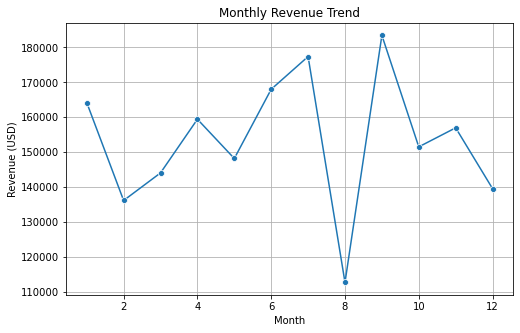

In [3]:

# Monthly Revenue Trend
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (USD)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


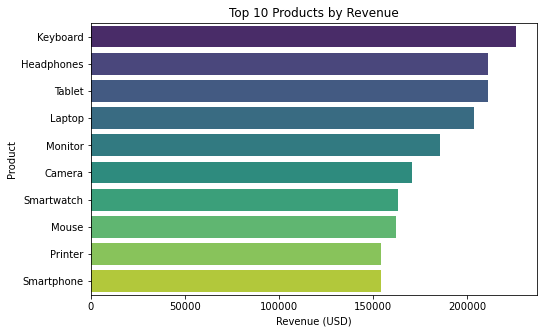

In [4]:

# Top 10 Products by Revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (USD)")
plt.show()


In [5]:

# Statistical Analysis with SciPy: Comparing average order revenue between two cities
city_a = df[df['City'] == 'New York City']['Revenue']
city_b = df[df['City'] == 'San Francisco']['Revenue']

t_stat, p_value = stats.ttest_ind(city_a, city_b, equal_var=False)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Significant difference in average revenue between the two cities.")
else:
    print("No significant difference found.")


T-Statistic: -0.9023548931428338
P-Value: 0.36743830960203716
No significant difference found.


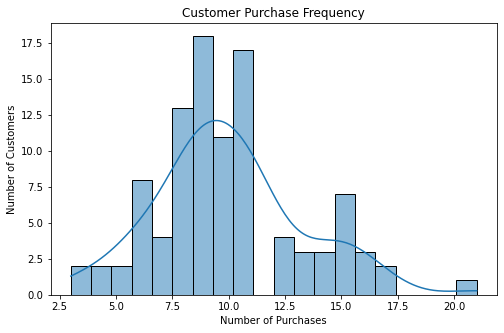

In [6]:

# Customer Purchase Frequency
customer_freq = df['Customer ID'].value_counts().reset_index()
customer_freq.columns = ['Customer ID', 'Purchase Count']

plt.figure(figsize=(8,5))
sns.histplot(customer_freq['Purchase Count'], bins=20, kde=True)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()
